<a href="https://colab.research.google.com/github/FunkyDonkey065/Facade_aesthetic_evaluator/blob/main/FAST_AI_ML_test_facade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install packages\
image retrieving funciton

In [ ]:
!pip install -U ddgs

from ddgs import DDGS
from fastcore.all import *

def search_images(keywords, max_images=200):
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

Test search

In [ ]:
urls = search_images('beautiful facade', max_images=1)
urls[0]

'https://thumbs.dreamstime.com/z/view-exterior-facade-modern-luxurious-story-house-decorated-beautiful-landscape-around-has-large-280701026.jpg'

download the image according to the url (beautiful facade)




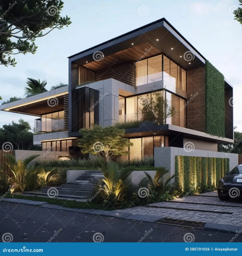

In [25]:
from fastdownload import download_url
dest = 'images_test1.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)


download the image according to the url (ugly facade)

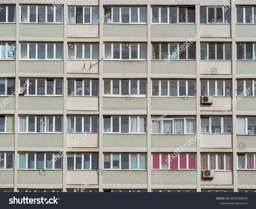

In [26]:
download_url(search_images('ugly facade', max_images=1)[0], 'images_test2.jpg', show_progress=False)
im = Image.open('images_test2.jpg')
im.to_thumb(256,256)

Formal search

In [ ]:
search_query = 'beautiful facade', 'ugly facade'
path = Path('facade')

for o in search_query:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{search_query}', max_images=100))
  time.sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)


# Train the model

remove the failed url download attempts

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

construct model data structure and determine the process method

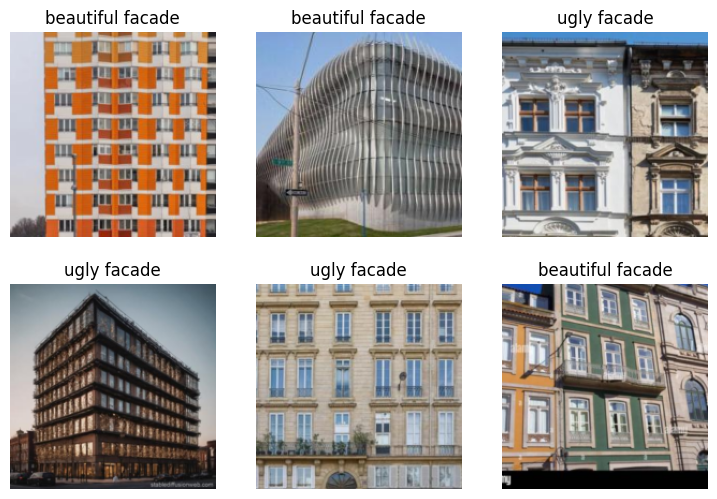

In [17]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='crop')]).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 146MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.319711,1.440255,0.514286,00:23


epoch,train_loss,valid_loss,error_rate,time
0,1.457318,1.337664,0.657143,00:30
1,1.372688,2.016554,0.857143,00:29
2,1.364038,2.326200,0.885714,00:32


test its ability of recognizing beautiful facades

In [29]:
is_beautiful,_,probs = learn.predict(PILImage.create('images_test2.jpg'))
print(f"This is a: {is_beautiful}.")
print(f"Probability it's a beautiful facade: {probs[0]:.4f}")
#

This is a: ugly facade.
Probability it's a beautiful facade: 0.3569
